In [14]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## 1. Load Dataset

In [15]:
# Load the resume dataset
df = pd.read_csv('../dataset/resumes.csv')

# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Resume,Category
0,Experienced Python developer with 5+ years in ...,Data Scientist
1,Senior Java developer with expertise in Spring...,Java Developer
2,"Full-stack web developer skilled in React, Nod...",Web Developer
3,"Data scientist with expertise in Python, R, an...",Data Scientist
4,"DevOps engineer with experience in Docker, Kub...",DevOps Engineer


## 2. Dataset Shape & Column Information

In [3]:
# Check dataset shape
print(f"Dataset Shape: {df.shape}")
print(f"Total Resumes: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")
print("\nColumn Names:")
print(df.columns.tolist())

Dataset Shape: (30, 2)
Total Resumes: 30
Total Columns: 2

Column Names:
['Resume', 'Category']


In [4]:
# Display dataset info
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resume    30 non-null     object
 1   Category  30 non-null     object
dtypes: object(2)
memory usage: 612.0+ bytes


## 3. Category Distribution

In [5]:
# Count of resumes per category
print("\nCategory Distribution:")
category_counts = df['Category'].value_counts()
print(category_counts)


Category Distribution:
Category
Data Scientist        6
Frontend Developer    4
Java Developer        3
Mobile Developer      3
Backend Developer     3
Web Developer         2
DevOps Engineer       2
Data Analyst          1
Python Developer      1
Cloud Architect       1
Business Analyst      1
QA Engineer           1
Data Engineer         1
Security Analyst      1
Name: count, dtype: int64


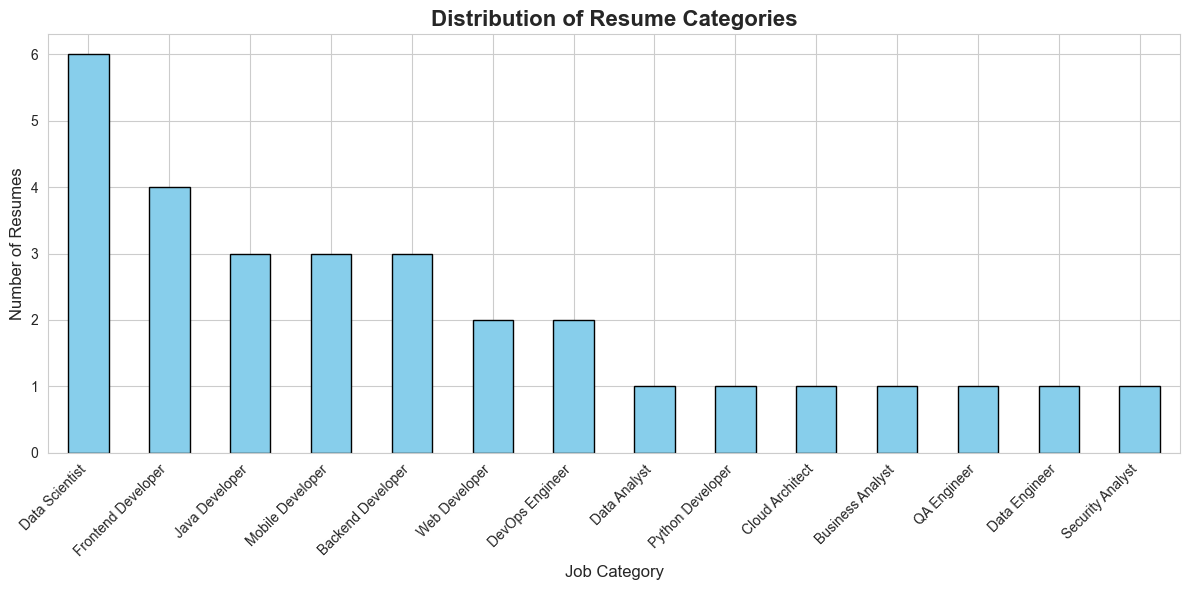


Total Categories: 14


In [6]:
# Visualize category distribution
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Resume Categories', fontsize=16, fontweight='bold')
plt.xlabel('Job Category', fontsize=12)
plt.ylabel('Number of Resumes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"\nTotal Categories: {df['Category'].nunique()}")

## 4. Check for Missing Values

In [7]:
# Check for null values
print("\nMissing Values:")
print(df.isnull().sum())
print(f"\nTotal Missing Values: {df.isnull().sum().sum()}")


Missing Values:
Resume      0
Category    0
dtype: int64

Total Missing Values: 0


## 5. Text Length Analysis

In [8]:
# Calculate text length for each resume
df['Resume_Length'] = df['Resume'].apply(len)

print("\nResume Text Length Statistics:")
print(df['Resume_Length'].describe())


Resume Text Length Statistics:
count     30.000000
mean     193.600000
std       17.018448
min      159.000000
25%      183.250000
50%      193.000000
75%      198.750000
max      252.000000
Name: Resume_Length, dtype: float64


In [9]:
# Calculate word count for each resume
df['Word_Count'] = df['Resume'].apply(lambda x: len(x.split()))

print("\nResume Word Count Statistics:")
print(df['Word_Count'].describe())


Resume Word Count Statistics:
count    30.000000
mean     25.466667
std       2.515241
min      23.000000
25%      24.000000
50%      25.000000
75%      26.750000
max      34.000000
Name: Word_Count, dtype: float64


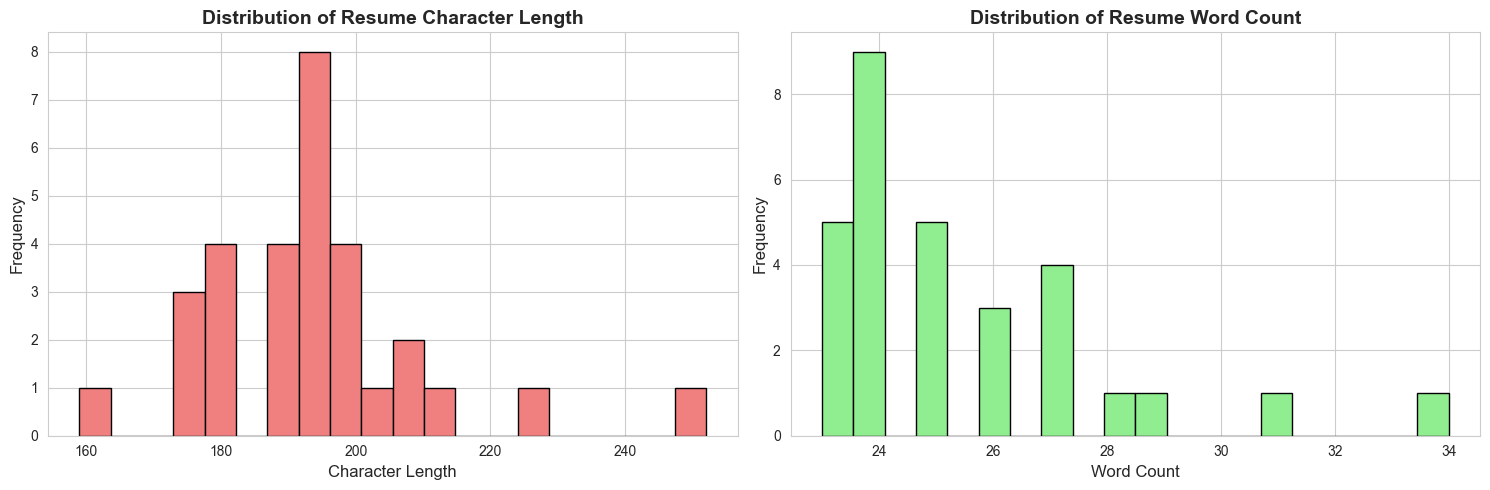

In [10]:
# Visualize text length distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Character length distribution
axes[0].hist(df['Resume_Length'], bins=20, color='lightcoral', edgecolor='black')
axes[0].set_title('Distribution of Resume Character Length', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Character Length', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Word count distribution
axes[1].hist(df['Word_Count'], bins=20, color='lightgreen', edgecolor='black')
axes[1].set_title('Distribution of Resume Word Count', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Word Count', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

In [11]:
# Average text length by category
print("\nAverage Resume Length by Category:")
category_stats = df.groupby('Category')[['Resume_Length', 'Word_Count']].mean().sort_values('Word_Count', ascending=False)
print(category_stats)


Average Resume Length by Category:
                    Resume_Length  Word_Count
Category                                     
Data Scientist         214.166667   28.500000
Data Engineer          193.000000   27.000000
Java Developer         199.000000   26.666667
DevOps Engineer        193.000000   25.500000
Mobile Developer       177.000000   25.333333
Cloud Architect        190.000000   25.000000
QA Engineer            187.000000   25.000000
Web Developer          195.500000   24.500000
Business Analyst       193.000000   24.000000
Python Developer       178.000000   24.000000
Security Analyst       196.000000   24.000000
Backend Developer      182.666667   23.666667
Frontend Developer     187.750000   23.500000
Data Analyst           182.000000   23.000000


## 6. Sample Resumes

In [12]:
# Display sample resumes from different categories
print("\nSample Resumes:")
for category in df['Category'].unique()[:3]:  # Show first 3 categories
    print(f"\n{'='*80}")
    print(f"Category: {category}")
    print(f"{'='*80}")
    sample = df[df['Category'] == category].iloc[0]['Resume']
    print(sample[:200] + "..." if len(sample) > 200 else sample)


Sample Resumes:

Category: Data Scientist
Experienced Python developer with 5+ years in machine learning and deep learning. Proficient in TensorFlow, PyTorch, scikit-learn, and NLP. Built recommendation systems and predictive models. Strong u...

Category: Java Developer
Senior Java developer with expertise in Spring Boot, Hibernate, and microservices architecture. Experience with RESTful APIs, MySQL, and MongoDB. Strong knowledge of design patterns and agile methodol...

Category: Web Developer
Full-stack web developer skilled in React, Node.js, Express, and MongoDB. Experience building responsive web applications with modern JavaScript frameworks. Proficient in HTML, CSS, and Redux.


## 7. Summary Statistics

In [13]:
# Print summary
print("\n" + "="*80)
print("EDA SUMMARY")
print("="*80)
print(f"✅ Total Resumes: {len(df)}")
print(f"✅ Total Job Categories: {df['Category'].nunique()}")
print(f"✅ Missing Values: {df.isnull().sum().sum()}")
print(f"✅ Average Resume Length: {df['Resume_Length'].mean():.2f} characters")
print(f"✅ Average Word Count: {df['Word_Count'].mean():.2f} words")
print("\n📊 Dataset is ready for preprocessing!")


EDA SUMMARY
✅ Total Resumes: 30
✅ Total Job Categories: 14
✅ Missing Values: 0
✅ Average Resume Length: 193.60 characters
✅ Average Word Count: 25.47 words

📊 Dataset is ready for preprocessing!
